In [12]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from scipy import interpolate
from scipy import optimize
import math
from collections import OrderedDict

1\. **Maximum wind speed prediction at the Sprogø station**

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```



[0.04545455 0.09090909 0.13636364 0.18181818 0.22727273 0.27272727
 0.31818182 0.36363636 0.40909091 0.45454545 0.5        0.54545455
 0.59090909 0.63636364 0.68181818 0.72727273 0.77272727 0.81818182
 0.86363636 0.90909091 0.95454545]
21
The value is: 32.97989844019469


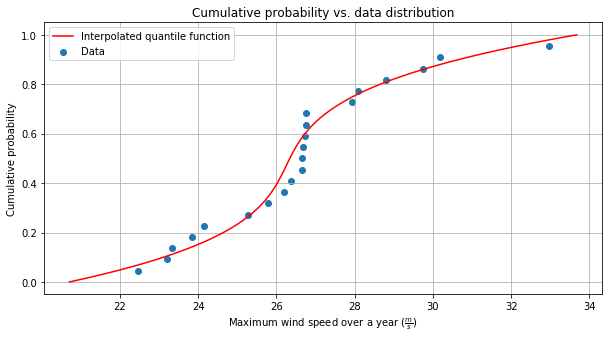

In [4]:
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]

N = years_nb

#cumulative probability: 
cprob = np.array([(i)/(N+1) for i in range(1,N+1)])
print(cprob)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sort = np.sort(max_speeds)

fifty_prob = 1. - 0.02



print(N)
quantile = interpolate.UnivariateSpline(cprob, sort)

ax.plot( quantile(np.linspace(0,1,1000)),np.linspace(0,1,1000), color = 'r',
        label="Interpolated quantile function")

ax.scatter(sort, cprob, label="Data")
ax.set_xlabel(r"Maximum wind speed over a year ($\frac{m}{s}$)")
ax.set_ylabel(r"Cumulative probability")
ax.set_title("Cumulative probability vs. data distribution")
ax.grid()
ax.legend()
print("The value is:", quantile(fifty_prob))

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

The difference in offset is -0.29052071400529655
The difference in offset, normalized wrt hot, is -0.02123812756395421


Text(0.5,1,'Min/max temperatures vs. month')

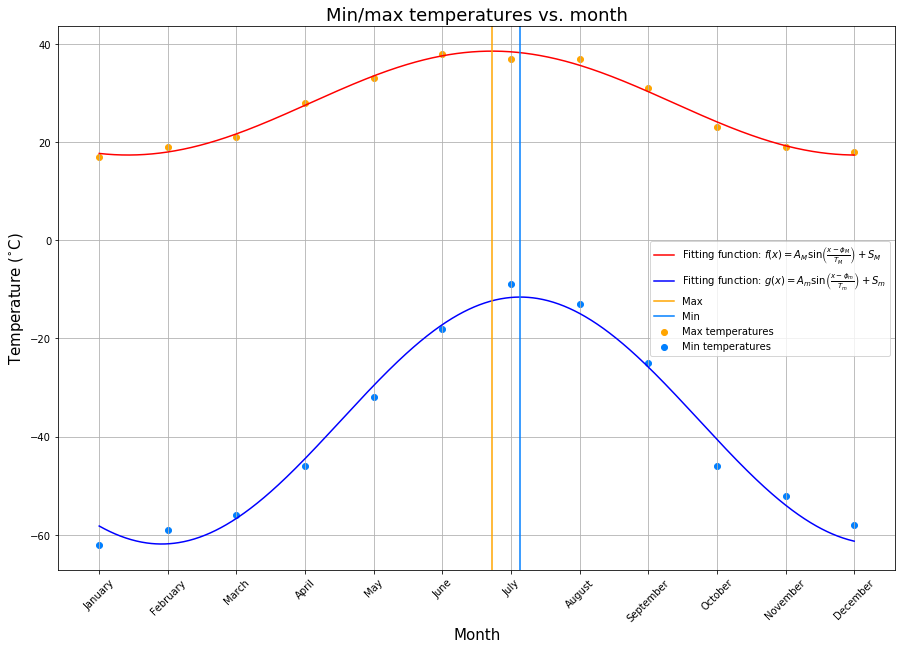

In [23]:
M = np.array([17,19,21,28,33,38,37,37,31,23,19,18])
m = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
calendar = ('January','February','March','April','May','June',
            'July','August','September','October','November','December')

extra = pd.DataFrame([M,m])
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
ax.scatter(np.arange(0,12), M, color = '#ffa500', label='Max temperatures')
ax.scatter(np.arange(0,12), m, color = '#007fff', label='Min temperatures')
plt.xticks(np.arange(0,12), calendar, rotation=45)
ax.grid()

#cose
months = np.arange(0,12)
hot = interpolate.UnivariateSpline(months, M)
cold = interpolate.UnivariateSpline(months, m)

xs = np.linspace(0,11,1000)

def ansatz1(x, period, amp, tr, ph):
    return amp*np.sin((x-ph)/period)+tr

fit_hot = optimize.curve_fit(ansatz1, months, M)
fit_cold = optimize.curve_fit(ansatz1, months, m)

#hypotheses
ax.plot(xs, ansatz1(xs,fit_hot[0][0],fit_hot[0][1], fit_hot[0][2], fit_hot[0][3]),
        color = 'red',
        label = r"Fitting function: $f(x) = A_M\sin{\left(\frac{x-\phi_M}{T_M}\right)}+S_M$")

ax.plot(xs, ansatz1(xs,fit_cold[0][0],fit_cold[0][1], fit_cold[0][2], fit_cold[0][3]),
        color = 'blue', 
        label = r"Fitting function: $g(x) = A_m\sin{\left(\frac{x-\phi_m}{T_m}\right)}+S_m$")

t_offh = fit_hot[0][3]
t_offc = fit_cold[0][3]

print("The difference in offset is", t_offh - t_offc)
print("The difference in offset, normalized wrt hot, is", (t_offh - t_offc)/t_offh)

#Max hot as vertical line
ax.axvline(x=xs[np.argmax(ansatz1(xs,fit_hot[0][0],fit_hot[0][1],
                                   fit_hot[0][2], fit_hot[0][3]))], color = '#ffa500', label="Max")

#Max cold as vertical line
ax.axvline(x=xs[np.argmax(ansatz1(xs,fit_cold[0][0],fit_cold[0][1],
                                   fit_cold[0][2], fit_cold[0][3]))], color = '#007fff', label="Min")

ax.legend()
ax.set_xlabel("Month",fontsize=15)
ax.set_ylabel(r"Temperature ($^∘$C)",fontsize=15)
ax.set_title("Min/max temperatures vs. month",fontsize=18)


The array that was used to look for the argmax of both interpolating functions is produced by a linspace function with 1000 points. This results in an array ("representing the time") which has a small step size, so small that it is sufficient to distinguish the maximum and the minimum.

3\. **2D minimization of a six-hump camelback function**

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?


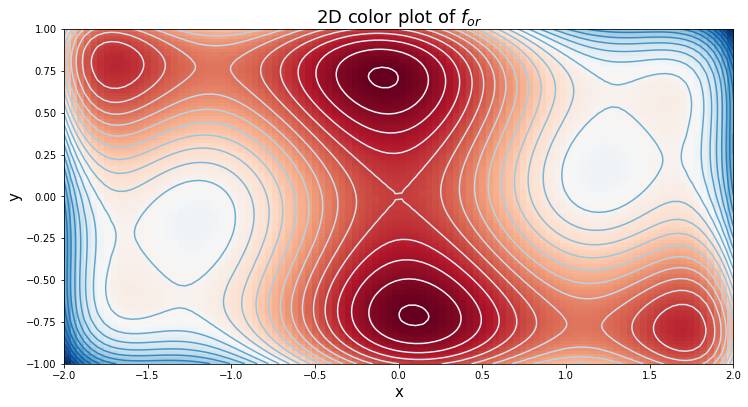

In [26]:
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
from numpy import arange

def f_or(x,y):
    return (4-2.1*x**2+(x**4)/3)*x**2+x*y+(4*y**2-4)*y**2


levels=np.arange(-2,6,0.25)

x_p = np.linspace(-2,2,100)
y_p = np.linspace(-1,1,100)
X,Y = np.meshgrid(x_p, y_p)

plt.figure(figsize=(12,12))
plt.imshow(f_or(X,Y), cmap='RdBu', origin='lower', extent=[-2, 2, -1, 1])
plt.contour(X,Y,f_or(X,Y), cmap='Blues', levels=levels)
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.title(r"2D color plot of $f_{or}$", fontsize=18)
plt.show()


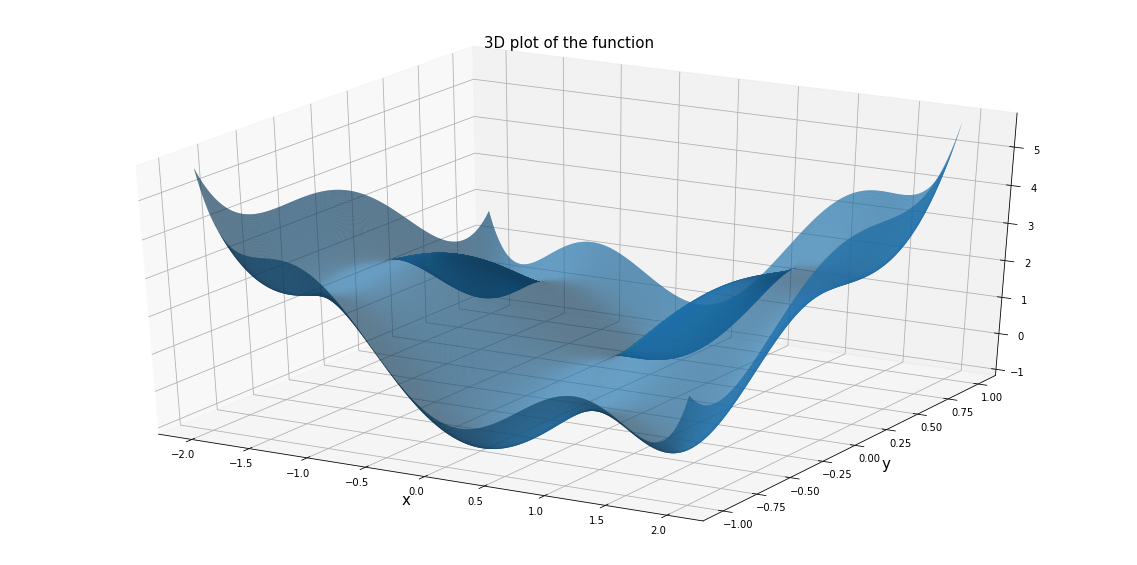

In [7]:
import matplotlib.cm as cm
from pylab import meshgrid
from mpl_toolkits.mplot3d import Axes3D


xs = np.linspace(-2, 2, 1000)
ys = np.linspace(-1, 1, 1000)
X,Y = np.meshgrid(xs, ys)

fig = plt.figure(figsize=(20, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, f_or(X, Y),cstride=1,rstride=1)
ax.set_xlabel("x", fontsize=15)
ax.set_ylabel("y", fontsize=15)
ax.set_title("3D plot of the function", fontsize=15)
plt.show()

In [8]:
def f(point):
    x,y=point 
    return (4-2.1*x**2+(x**4)/3)*x**2+x*y+(4*y**2-4)*y**2

init = [0, 0]
sol = optimize.minimize(f, init)

if sol.success:
    print("The algorithm finished successfully, and produced the following solution: ",f(sol.x))
else:
    print("The algorithm failed.")
    
#The solution is equal to the initialization, as we are starting the algorithm in a saddle point.

The algorithm finished successfully, and produced the following solution:  0.0


In [9]:
found_points = []
found_vals = []
ins = []
#bnds = [((),())]
bnds = [((-2,-1),(-1,0)), ((-1,-1),(1,0)), ((1,-1),(2,0)), 
        ((-2,0),(-1,1)), ((-1,0),(1,1)), ((1,0),(2,1))] 
#bounds of the variables

def f(params): 
    x,y=params 
    return (4-2.1*x**2+(x**4)/3)*x**2+x*y+(4*y**2-4)*y**2


for j in range(len(bnds)):
    init = [(bnds[j][0][0]+bnds[j][1][0])/2+np.random.uniform(-0.25,0.25)
            ,(bnds[j][0][1]+bnds[j][1][1])/2+np.random.uniform(-0.25,0.25)] 
    #median points of each sector
    ins.append(init)
    sol = optimize.minimize(f, init, bounds = bnds[j], method = 'Nelder-Mead')
    if sol.success:
        print("The algorithm finished successfully, and produced the following solution: f(x,y)=",
              f(sol.x))
        found_points.append(sol.x)
        found_vals.append(sol.fun)


The algorithm finished successfully, and produced the following solution: f(x,y)= 2.104250312611398
The algorithm finished successfully, and produced the following solution: f(x,y)= -1.0316284417432444
The algorithm finished successfully, and produced the following solution: f(x,y)= -0.21546381694463368
The algorithm finished successfully, and produced the following solution: f(x,y)= -0.21546381486336974
The algorithm finished successfully, and produced the following solution: f(x,y)= -1.0316284469182169
The algorithm finished successfully, and produced the following solution: f(x,y)= 2.1042503119109286


C:\Users\Perin\Anaconda\lib\site-packages\scipy\optimize\_minimize.py:518: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)


Xmin=	 0.08978748217682192 
Ymin=	 0.08978748217682192
f(Xmin,Ymin)=	 -1.0316284417432444 

Xmin=	 -0.0898267442996738 
Ymin=	 -0.0898267442996738
f(Xmin,Ymin)=	 -1.0316284469182169 

((-2, -1), (-1, 0))
((-1, -1), (1, 0))
((1, -1), (2, 0))
((-2, 0), (-1, 1))
((-1, 0), (1, 1))
((1, 0), (2, 1))


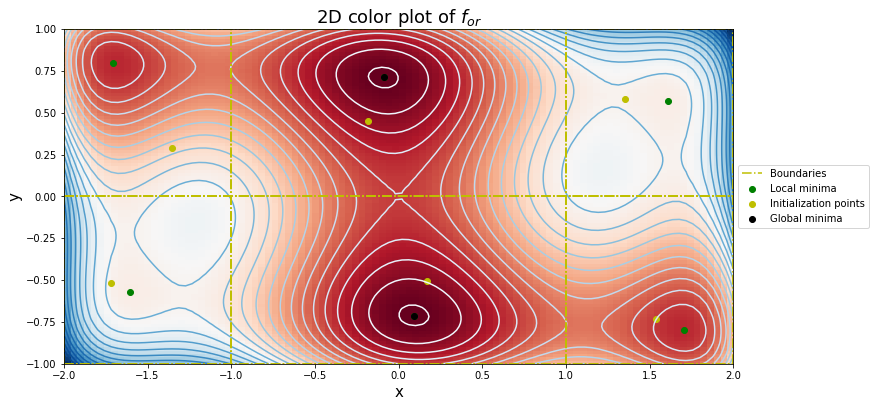

In [32]:
#replotting...
x_p = np.linspace(-2,2,100)
y_p = np.linspace(-1,1,100)
X,Y = np.meshgrid(x_p, y_p)

levels=np.arange(-2,6,0.25)


plt.figure(figsize=(12,12))
plt.imshow(f_or(X,Y), cmap='RdBu', origin='lower', extent=[-2, 2, -1, 1])
plt.contour(X,Y,f_or(X,Y), cmap='Blues', levels=levels)
plt.xlabel("x", fontsize=15)
plt.ylabel("y", fontsize=15)
plt.title(r"2D color plot of $f_{or}$", fontsize=18)

#plotting the various points (init, local minima)
for i in range(len(found_points)):
    plt.scatter(found_points[i][0],found_points[i][1], color='g', label = "Local minima")
for i in range(len(ins)):
    plt.scatter(ins[i][0],ins[i][1], color='y', label = "Initialization points")
    
#finding the lowest value of f
globmin = np.amin(found_vals)

#plotting the global minima
for i in range(len(found_points)):
    #due to machine precision, close points must be considere
    if np.allclose(f(found_points[i]),globmin): 
        plt.scatter(found_points[i][0],found_points[i][1], color='k',
                    label = "Global minima")
        print("Xmin=\t",found_points[i][0],"\nYmin=\t",found_points[i][0])
        print("f(Xmin,Ymin)=\t",f(found_points[i]),"\n")
        
#showing the bounds of the various searching zones
for j in bnds:
    print(j)
    for i in j:      
        plt.axvline(i[0], c='y', ls='-.', label='Boundaries')
        plt.axhline(i[1], c='y', ls='-.', label='Boundaries')
            

#plt.legend()
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

4\. **FFT of a simple dataset**

Performe a periodicity analysis on the lynxs-hares population

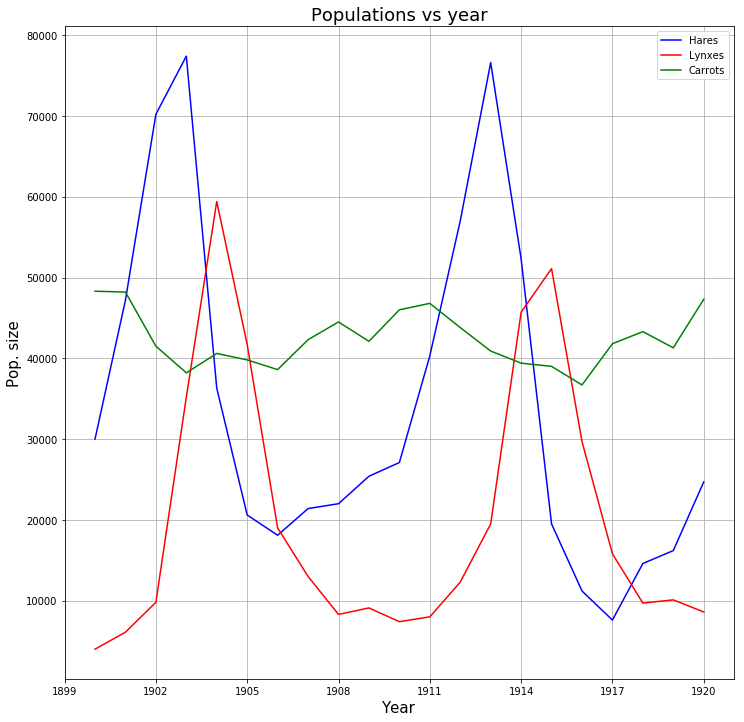

C:\Users\Perin\Anaconda\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


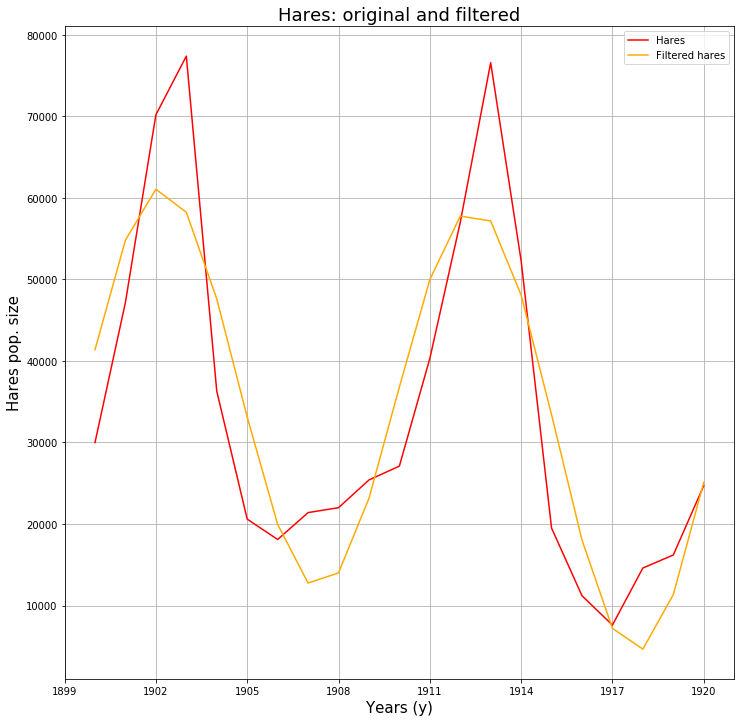

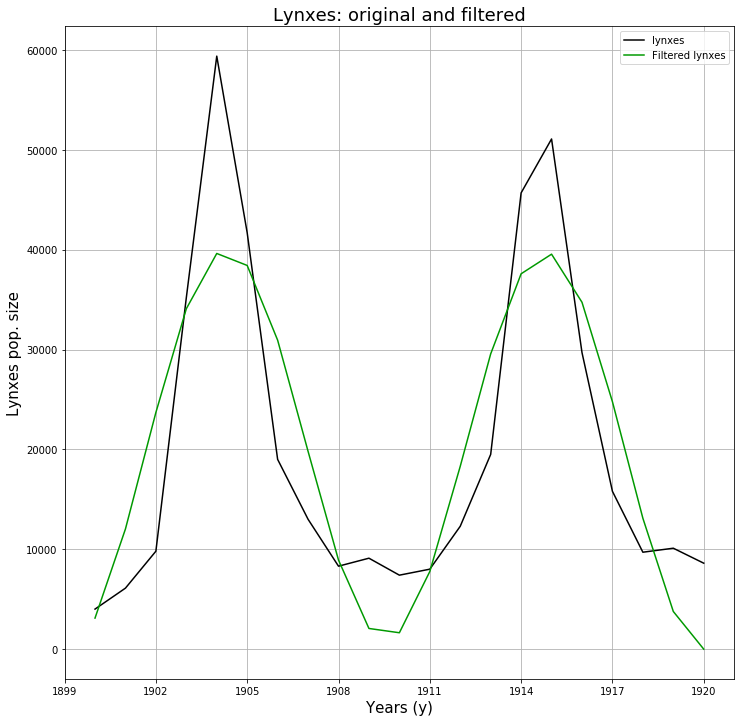

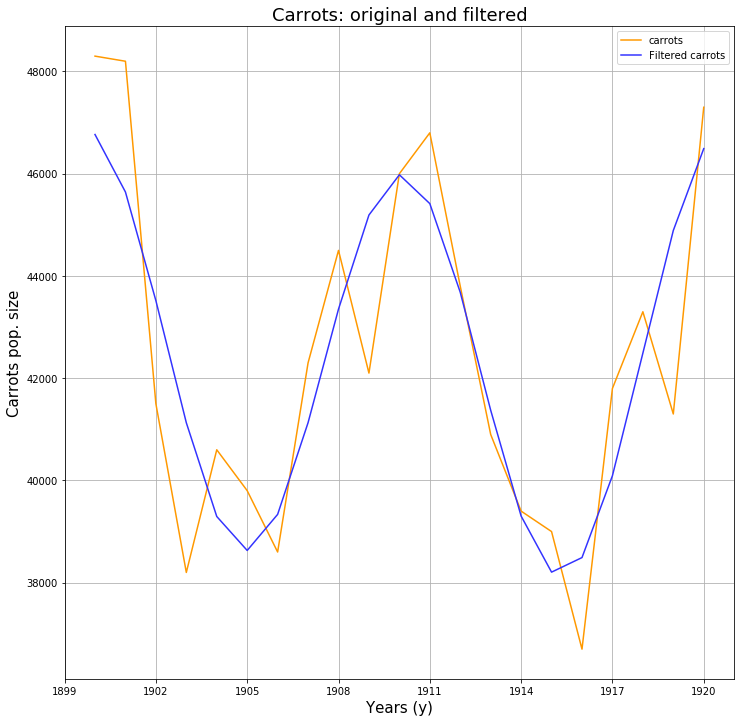

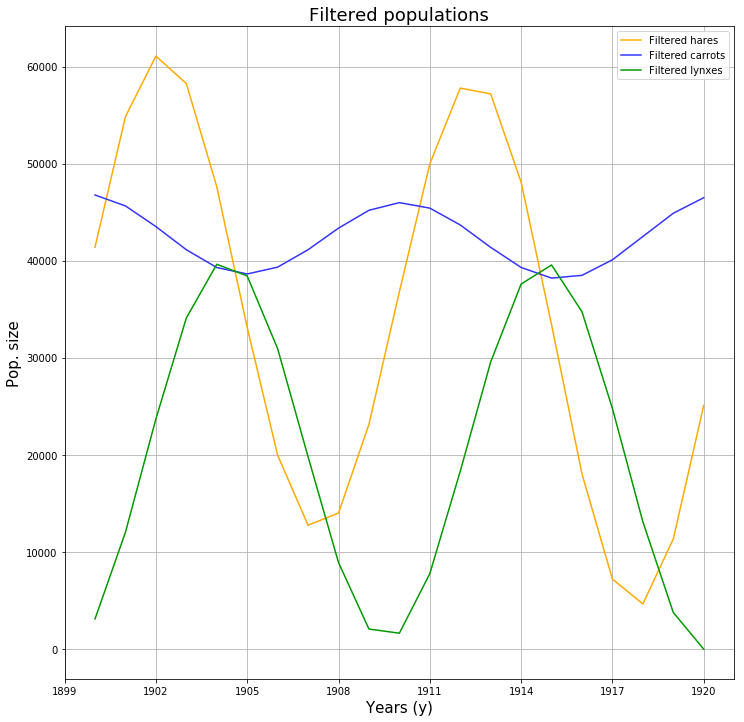

In [50]:
import numpy as np
import scipy as sp
from scipy import fftpack
from scipy import signal
from matplotlib.ticker import MaxNLocator
from matplotlib import pyplot as plt

%matplotlib inline
#plt.style.use('ggplot')
%precision 4
np.set_printoptions(suppress=True)




# loading dataset
data = np.loadtxt('populations.txt')
years, hares, lynxes, carrots = data.T

#for reference, standard plotting is reproduced here
ax = plt.figure(figsize=(12,12)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Populations vs year", fontsize=18)
plt.plot(year, hares, color='blue', label="Hares")
plt.plot(year, lynxes, color='red', label="Lynxes")
plt.plot(year, carrots, color='green', label="Carrots")
plt.xlabel('Year', fontsize=15)
plt.ylabel('Pop. size', fontsize=15)
plt.grid()
plt.legend()
plt.show()


fft_hares = fftpack.fft(hares)
fft_lynxes = fftpack.fft(lynxes)
fft_carrots = fftpack.fft(carrots)

power_hares = np.abs(fft_hares)
power_lynxes = np.abs(fft_lynxes)
power_carrots = np.abs(fft_carrots)

sample_freqs = fftpack.fftfreq(hares.size)

mask = np.where(sample_freqs > 0)

freqs = sample_freqs[mask]

peak_h = freqs[power_hares[mask].argmax()]
peak_l = freqs[power_lynxes[mask].argmax()]
peak_c = freqs[power_carrots[mask].argmax()]

high_freq_h = fft_hares.copy()
high_freq_l = fft_lynxes.copy()
high_freq_c = fft_carrots.copy()

high_freq_h[np.abs(sample_freqs)>peak_h] = 0
high_freq_l[np.abs(sample_freqs)>peak_l] = 0
high_freq_c[np.abs(sample_freqs)>peak_c] = 0

filtered_h = fftpack.ifft(high_freq_h)
filtered_l = fftpack.ifft(high_freq_l)
filtered_c = fftpack.ifft(high_freq_c)

ax = plt.figure(figsize=(12,12)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Hares: original and filtered", fontsize=18)
plt.plot(years, hares,  color='r', label="Hares")
plt.plot(years, filtered_h, label='Filtered hares', color="#ffaa00")
plt.xlabel('Years (y)', fontsize=15)
plt.ylabel('Hares pop. size', fontsize=15)
plt.legend()
plt.grid()
plt.show()

ax = plt.figure(figsize=(12,12)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Lynxes: original and filtered", fontsize=18)
plt.plot(years, lynxes, label='lynxes', color="#000000")
plt.plot(years, filtered_l, label='Filtered lynxes', color="#009900")
plt.xlabel('Years (y)', fontsize=15)
plt.ylabel('Lynxes pop. size', fontsize=15)
plt.grid()
plt.legend()
plt.show()

ax = plt.figure(figsize=(12,12)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Carrots: original and filtered", fontsize=18)
plt.plot(years, carrots, label='carrots', color='#ff9900')
plt.plot(years, filtered_c, label='Filtered carrots', color="#3333ff")
plt.xlabel('Years (y)', fontsize=15)
plt.ylabel('Carrots pop. size', fontsize=15)
plt.grid()
plt.legend()
plt.show()

ax = plt.figure(figsize=(12,12)).gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Filtered populations", fontsize=18)
plt.plot(years, filtered_h, label='Filtered hares', color="#ffaa00")
plt.plot(years, filtered_c, label='Filtered carrots', color="#3333ff")
plt.plot(years, filtered_l, label='Filtered lynxes', color="#009900")
plt.xlabel('Years (y)', fontsize=15)
plt.ylabel('Pop. size', fontsize=15)
plt.legend()
plt.grid()
plt.show()

5\. **FFT of an image**

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

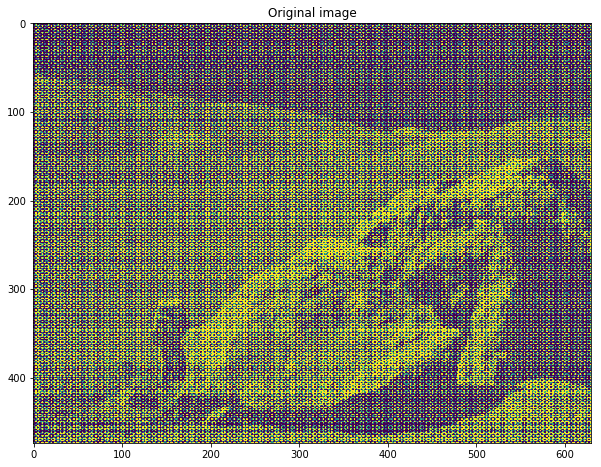

/opt/ubuntu-16.04/conda/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


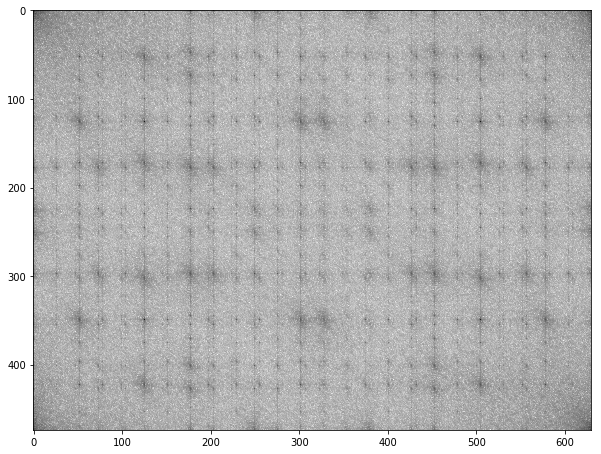

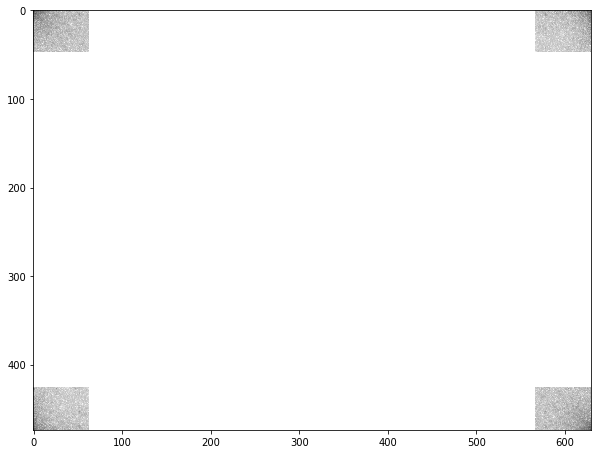

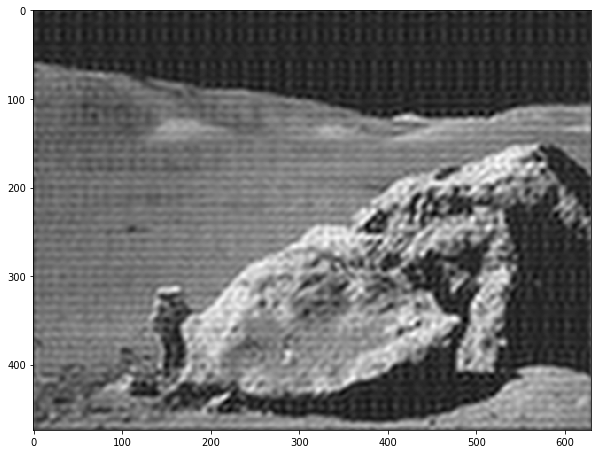

In [3]:
import matplotlib.pyplot as plt
from scipy import fftpack
import matplotlib.colors as colors

plt.figure(figsize=(10, 15))
img = plt.imread('moonlanding.png').astype('float')
#plt.imshow(img, plt.cm.gray)
plt.imshow(img)
plt.title('Original image')
plt.show()

plt.figure(figsize=(10, 15))
spectrum = fftpack.fft2(img)
spec = np.abs(spectrum)
plt.imshow(spec, norm = colors.LogNorm(vmin = spec.min(), vmax = spec.max()), cmap = 'Greys')
#plt.colorbar()

keep = 0.1

new_spec = spectrum.copy()
new_spec[int(keep * new_spec.shape[0]):int((1-keep) * new_spec.shape[0])] = 0
new_spec[:,int(keep * new_spec.shape[1]):int((1-keep) * new_spec.shape[1])] = 0


plt.figure(figsize=(10, 15))
plt.imshow(np.abs(new_spec), norm = colors.LogNorm(), cmap = 'Greys')


plt.figure(figsize=(10, 15))
new_img = fftpack.ifft2(new_spec).real
plt.imshow(new_img, plt.cm.gray)



/opt/ubuntu-16.04/conda/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


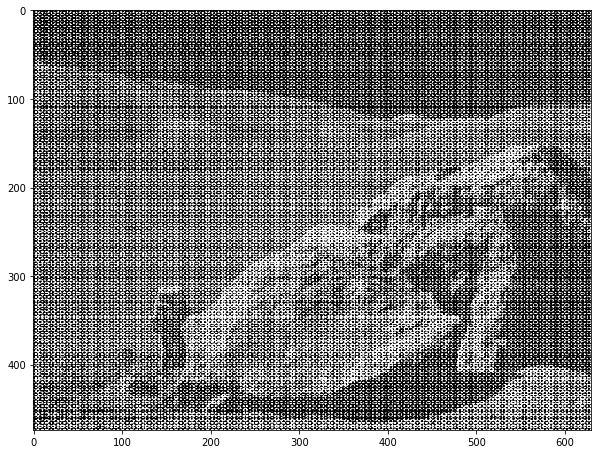

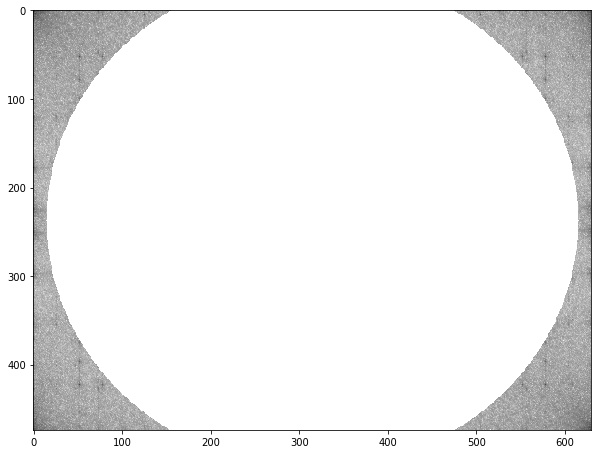

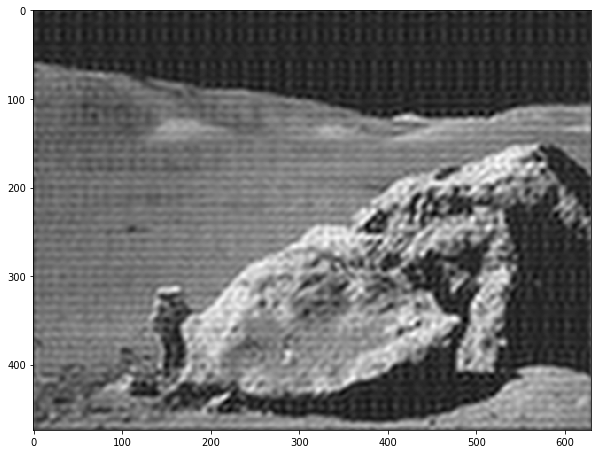

In [4]:
import matplotlib.pyplot as plt
from scipy import fftpack
import matplotlib.colors as colors

img = plt.imread('moonlanding.png').astype('float')

plt.figure(figsize=(10, 15))
spectrum = fftpack.fft2(img)
plt.imshow(img, plt.cm.gray)

spectrum = fftpack.fft2(img)

#elliptical masking


a=300 #x semi axis 
b=280 #y semi axis 
cx = spectrum.shape[0]
cy = spectrum.shape[1]

y,x = np.ogrid[-cx//2:cx-cx//2, -cy//2:cy-cy//2]
mask = x*x/(a**2) + y*y/(b**2) <= 1

filtered = spectrum.copy()
filtered[mask] = 0

#plotting the effects of the elliptic masking
plt.figure(figsize=(10, 15))
plt.imshow(np.abs(filtered), norm = colors.LogNorm(), cmap = 'Greys')



plt.figure(figsize=(10, 15))
new_img_ell_1 = fftpack.ifft2(new_spec).real
plt.imshow(new_img_ell_1, plt.cm.gray)

/opt/ubuntu-16.04/conda/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


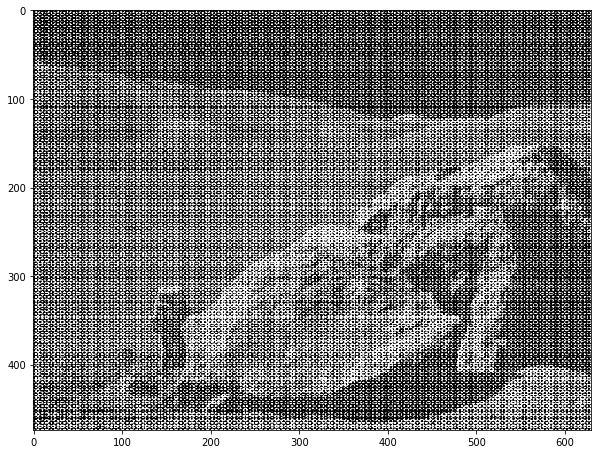

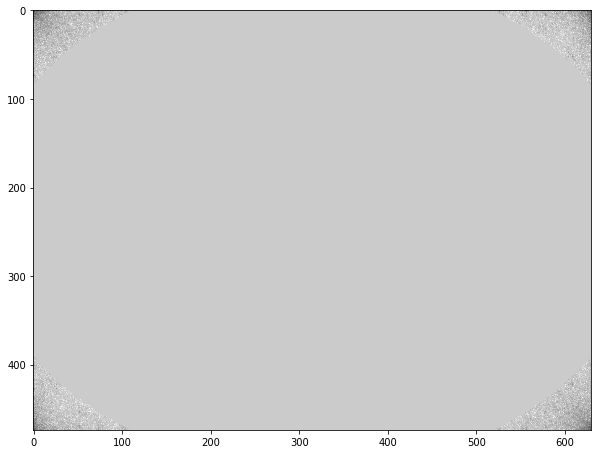

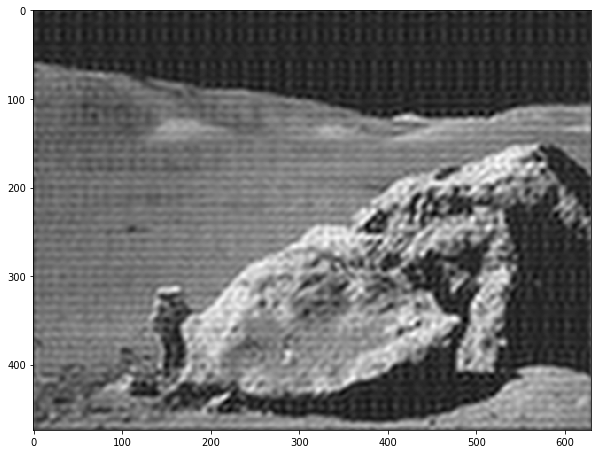

In [5]:
import matplotlib.pyplot as plt
from scipy import fftpack
import matplotlib.colors as colors

img = plt.imread('moonlanding.png').astype('float')

plt.figure(figsize=(10, 15))
spectrum = fftpack.fft2(img)
plt.imshow(img, plt.cm.gray)

spectrum = fftpack.fft2(img)

#elliptical masking

cx = spectrum.shape[0]
cy = spectrum.shape[1]
ratio = cx/cy
a=375 #x semi axis 
b=int(a*ratio) #y semi axis 

y,x = np.ogrid[-cx//2:cx-cx//2, -cy//2:cy-cy//2]
mask = x*x/(a**2) + y*y/(b**2) <= 1

filtered = spectrum.copy()
mean = np.abs(filtered).mean()
filtered[mask] = mean

#plotting the effects of the elliptic masking
plt.figure(figsize=(10, 15))
plt.imshow(np.abs(filtered), norm = colors.LogNorm(), cmap = 'Greys')



plt.figure(figsize=(10, 15))
new_img_ell_2 = fftpack.ifft2(new_spec).real
plt.imshow(new_img_ell_2, plt.cm.gray)

/opt/ubuntu-16.04/conda/lib/python3.6/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


(474, 630)
(474, 630)


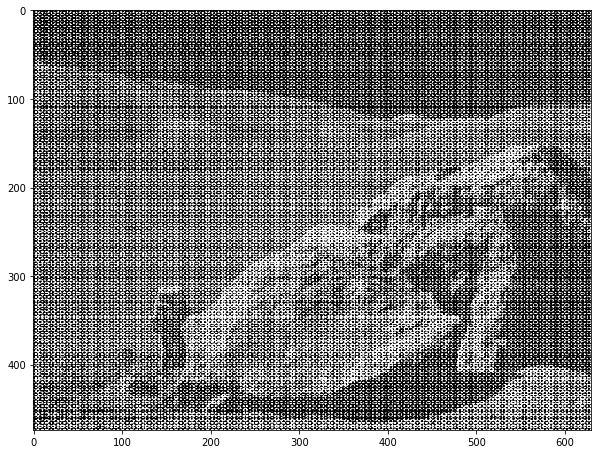

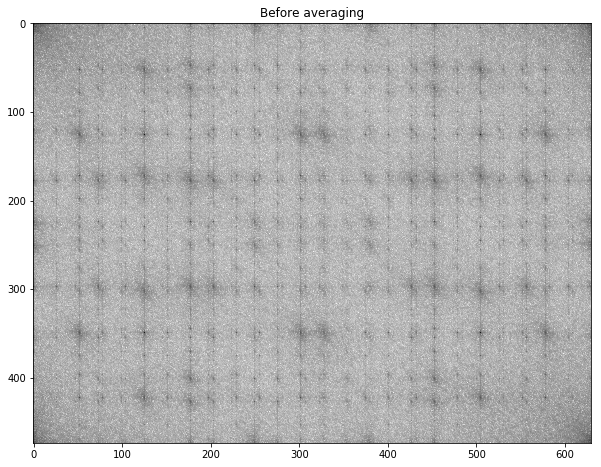

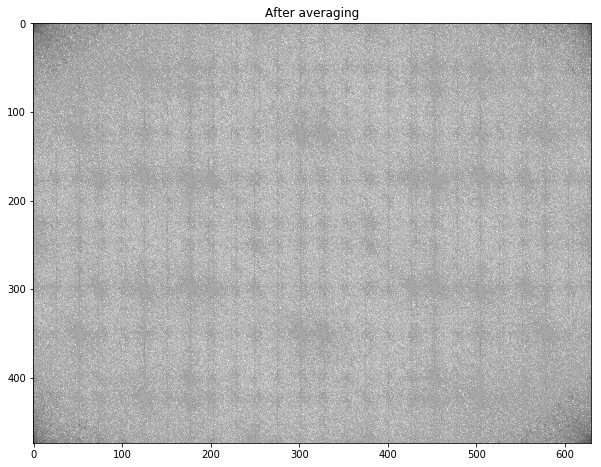

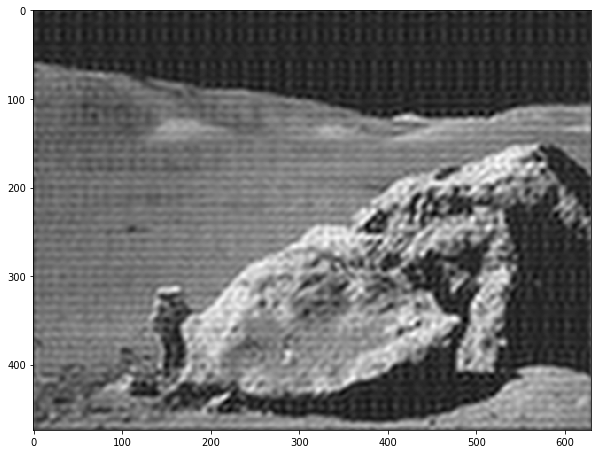

In [6]:
import matplotlib.pyplot as plt
from scipy import fftpack
import matplotlib.colors as colors

img = plt.imread('moonlanding.png').astype('float')

plt.figure(figsize=(10, 15))
spectrum = fftpack.fft2(img)
plt.imshow(img, plt.cm.gray)

spectrum = fftpack.fft2(img)

#elliptical masking

cx = spectrum.shape[0]
cy = spectrum.shape[1]
ratio = cx/cy
a=375 #x semi axis 
b=int(a*ratio) #y semi axis 

y,x = np.ogrid[-cx//2:cx-cx//2, -cy//2:cy-cy//2]
mask = x*x/(a**2) + y*y/(b**2) <= 1

filtered = spectrum.copy()
mean = np.abs(filtered).mean()
std = np.abs(filtered).std()

#def taglia(x):
#    if (x-mean)<std:
#        return x
#    else:
#        return mean
    
taglia = lambda x: x if np.abs(x-mean)<std/3 else mean  

mediato = np.array([[taglia(filtered[j,i]) for i in range(spectrum.shape[1])] for j in range(spectrum.shape[0])])    
print(mediato.shape) 
print(filtered.shape)

plt.figure(figsize=(10, 15))
plt.imshow(np.abs(filtered), norm = colors.LogNorm(), cmap = 'Greys')
plt.title("Before averaging")

filtered[mask] = mediato[mask]

#plotting the effects of the elliptic masking
plt.figure(figsize=(10, 15))
plt.imshow(np.abs(filtered), norm = colors.LogNorm(), cmap = 'Greys')
plt.title("After averaging")



plt.figure(figsize=(10, 15))
new_img_f = fftpack.ifft2(new_spec).real
plt.imshow(new_img_f, plt.cm.gray)

Text(0.5, 1.0, 'Ellipse-like averaging of spectrum elements')

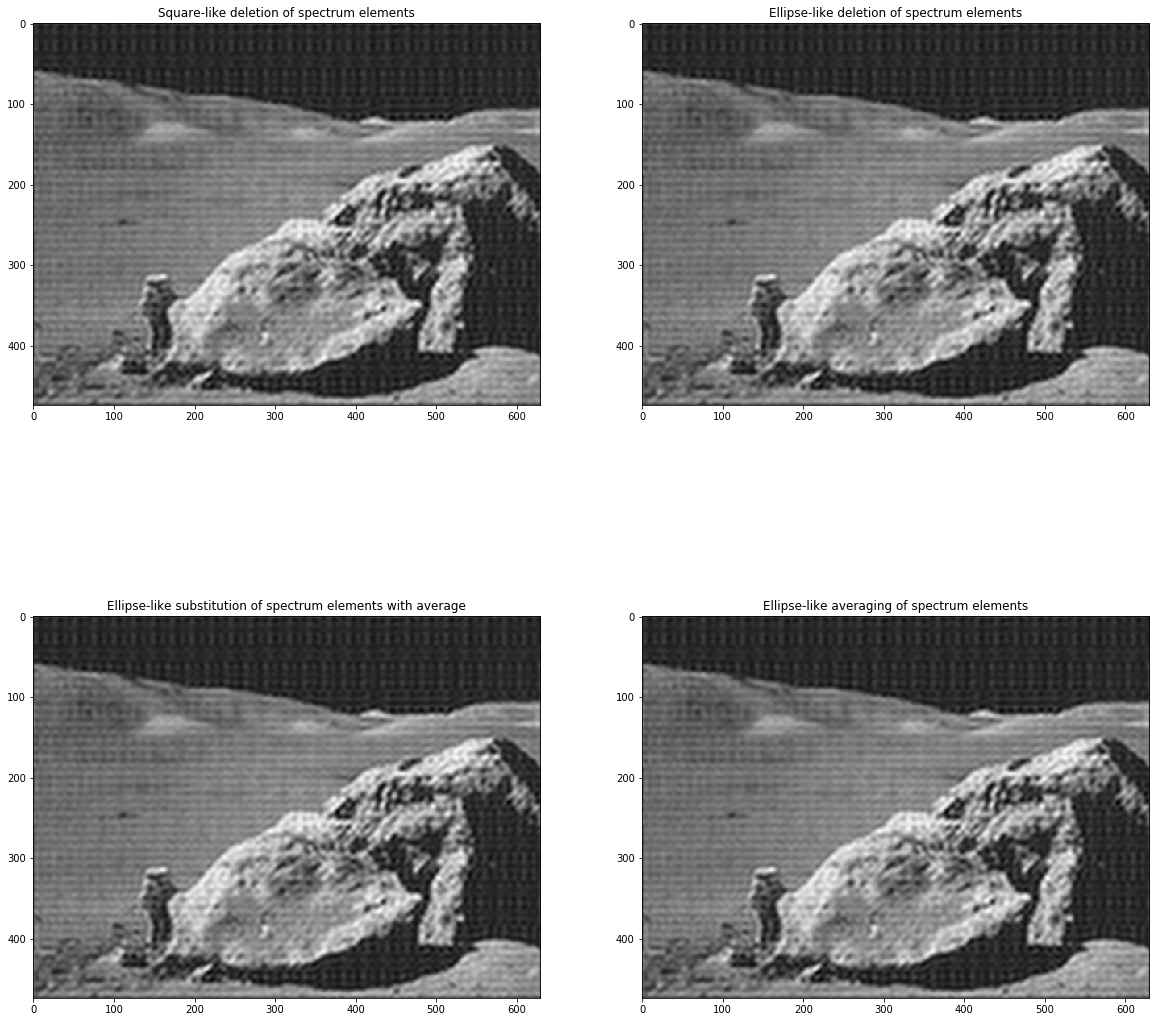

In [7]:
plt.figure(figsize=(20, 20)).tight_layout()

plt.subplot(2, 2, 1)
plt.imshow(new_img, plt.cm.gray)
plt.title("Square-like deletion of spectrum elements")

plt.subplot(2, 2, 2)
plt.imshow(new_img_ell_1, plt.cm.gray)
plt.title("Ellipse-like deletion of spectrum elements")

plt.subplot(2, 2, 3)
plt.imshow(new_img_ell_2, plt.cm.gray)
plt.title("Ellipse-like substitution of spectrum elements with average")

plt.subplot(2, 2, 4)
plt.imshow(new_img_f, plt.cm.gray)
plt.title("Ellipse-like averaging of spectrum elements")
